In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Titanic dataset from seaborn's built-in dataset repository
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# General information about the dataset
df.info()

# Descriptive statistics
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

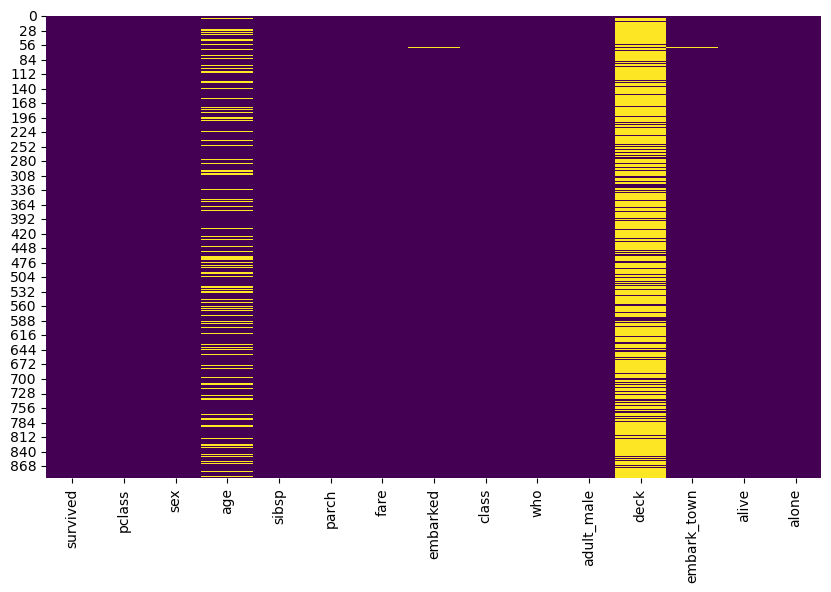

In [4]:
# Visualizing missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Handling missing values: 
# Filling missing values in 'age' with the median, and 'embarked' with the mode
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Dropping rows where 'survived' column is missing (optional, depending on context)
df.dropna(subset=['survived'], inplace=True)

# Checking again for missing values
df.isnull().sum()

In [5]:
# Checking for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")

# Dropping duplicates
df.drop_duplicates(inplace=True)

Duplicate rows: 110


<Axes: xlabel='age'>

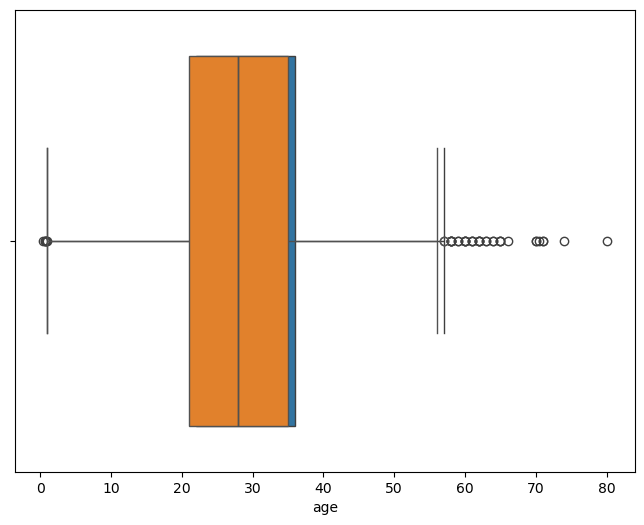

In [6]:
# Identifying outliers in 'age' using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'])

# Removing outliers: Consider values outside 1.5*IQR as outliers
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out outliers
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Verifying outliers removal
sns.boxplot(x=df['age'])

In [7]:
# Creating a new feature: family size
df['family_size'] = df['sibsp'] + df['parch']

# Creating a new feature: age group
df['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 40, 60, np.inf], labels=['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior'])

# Display the changes
df[['age', 'family_size', 'age_group']].head()

,age,family_size,age_group
0,22.0,1,Adult
1,38.0,1,Adult
2,26.0,0,Adult
3,35.0,1,Adult
4,35.0,0,Adult


In [8]:
# Encoding 'sex' column using label encoding
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Encoding 'embarked' column using one-hot encoding
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

# Verifying the changes
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,family_size,age_group,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,1,Adult,False,True
1,1,1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,1,Adult,False,False
2,1,3,1,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,0,Adult,False,True
3,1,1,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,1,Adult,False,True
4,0,3,0,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,0,Adult,False,True


In [9]:
from sklearn.preprocessing import StandardScaler

# Scaling the 'age' and 'family_size' columns
scaler = StandardScaler()
df[['age', 'family_size']] = scaler.fit_transform(df[['age', 'family_size']])

# Verifying the scaled values
df[['age', 'family_size']].head()

,age,family_size
0,-0.539838,0.031626
1,0.821887,0.031626
2,-0.199407,-0.620225
3,0.566563,0.031626
4,0.566563,-0.620225


In [10]:
# Final check of the dataset
df.info()

# Final dataset preview
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     742 non-null    int64   
 1   pclass       742 non-null    int64   
 2   sex          742 non-null    int64   
 3   age          742 non-null    float64 
 4   sibsp        742 non-null    int64   
 5   parch        742 non-null    int64   
 6   fare         742 non-null    float64 
 7   class        742 non-null    category
 8   who          742 non-null    object  
 9   adult_male   742 non-null    bool    
 10  deck         183 non-null    category
 11  embark_town  741 non-null    object  
 12  alive        742 non-null    object  
 13  alone        742 non-null    bool    
 14  family_size  742 non-null    float64 
 15  age_group    742 non-null    category
 16  embarked_Q   742 non-null    bool    
 17  embarked_S   742 non-null    bool    
dtypes: bool(4), category(3), float64(3)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,family_size,age_group,embarked_Q,embarked_S
0,0,3,0,-0.539838,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,0.031626,Adult,False,True
1,1,1,1,0.821887,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,0.031626,Adult,False,False
2,1,3,1,-0.199407,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,-0.620225,Adult,False,True
3,1,1,1,0.566563,1,0,53.1000,First,woman,False,C,Southampton,yes,False,0.031626,Adult,False,True
4,0,3,0,0.566563,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,-0.620225,Adult,False,True


In [11]:
# Saving the cleaned data to a CSV file
df.to_csv('cleaned_titanic_data.csv', index=False)